In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from IPython import get_ipython
import math


get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
path = "/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_1/"
file = "amcl_laser"
file_2 = "_num_markers"
file_3 = "_num_particles"
file_4 = "_weight_sensor"
type_file =".txt"
full_path = str(path + file + type_file)
full_path_2 = str(path + file  + file_2 + type_file)
full_path_3 = str(path + file  + file_3 + type_file)
full_path_4 = str(path + file  + file_4 + type_file)
full_path_4

'/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_1/amcl_laser_weight_sensor.txt'

In [15]:
data = pandas.read_csv(full_path, skipinitialspace = True)
data.head()

,Time,X position error,Y position error,Position error,YALL error,X deviation,Y deviation,YALL deviation,Mean deviation
0,3.956,0.025660,0.013373,0.028936,-0.021953,0.464810,0.489562,0.259455,0.404609
1,5.428,0.009424,0.004377,0.010391,-0.036208,0.433866,0.475207,0.245262,0.384778
2,6.856,0.005259,0.006301,0.008207,-0.038676,0.423141,0.462390,0.238978,0.374836
3,8.326,0.030126,0.020906,0.036670,-0.039656,0.396603,0.436737,0.220057,0.351132
4,9.754,0.028359,0.014714,0.031949,-0.027395,0.356435,0.416840,0.210008,0.327761


In [4]:
data_2 = pandas.read_csv(full_path_2, skipinitialspace = True)
data_2.head()

,Time,Num Markers
0,0.059,1
1,0.158,1
2,0.254,1
3,0.357,1
4,0.456,1


In [5]:
data_3 = pandas.read_csv(full_path_3, skipinitialspace = True)
data_3.head()

,Time,Num Particles
0,0.001,2262
1,3.965,2010
2,5.433,1820
3,6.858,1514
4,8.370,1312


In [6]:
data_4 = pandas.read_csv(full_path_4, skipinitialspace = True)
data_4.head()

,Time,Weight Laser,Weight Marker
0,0.000,0.000000,0
1,3.953,1.436574,0
2,5.428,1.522623,0
3,6.854,1.638346,0
4,8.324,1.794912,0


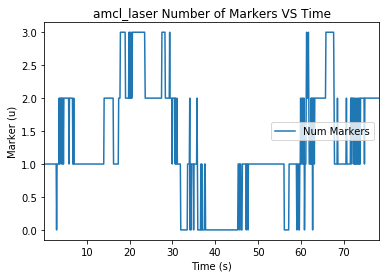

In [7]:
data_2.plot(kind = "line", x = "Time" ,y = {"Num Markers"})
plt.ylabel("Marker (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Markers VS Time")
plt.savefig( file + "_num_markers.png")

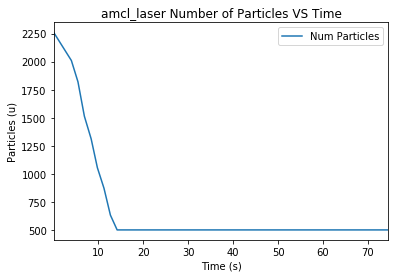

In [8]:
data_3.plot(kind = "line", x = "Time" ,y = {"Num Particles"})
plt.ylabel("Particles (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Particles VS Time")
plt.savefig( file + "_num_particles.png")

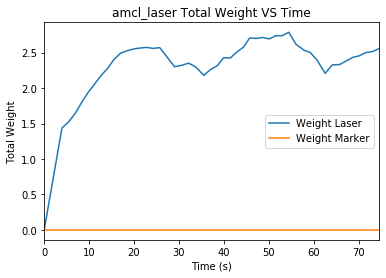

In [9]:
data_4.plot(kind = "line", x = "Time" ,y = {"Weight Laser", "Weight Marker"})
plt.ylabel("Total Weight")
plt.xlabel("Time (s)")
plt.title(file + " Total Weight VS Time")
plt.savefig( file + "_total_weight.png")

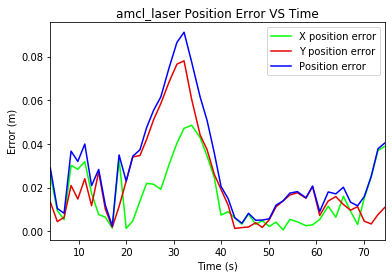

In [10]:
data.plot(kind = "line", x = "Time" ,y = {"X position error", "Y position error", "Position error"}, color = {(0.9,0.0,0.0), (0.0,1.0,0.0), (0.0,0.0,1.0)})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Position Error VS Time")
plt.savefig( file + "_position_error.png")

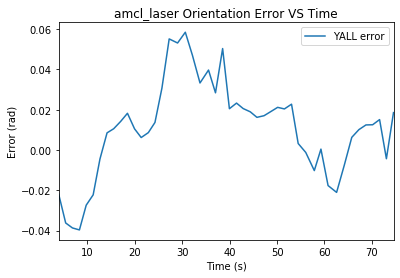

In [16]:
data.plot(kind = "line", x = "Time" ,y = {"YALL error"})
plt.ylabel("Error (rad)")
plt.xlabel("Time (s)")
plt.title(file + " Orientation Error VS Time")
plt.savefig(file + "_orientation_error.png")

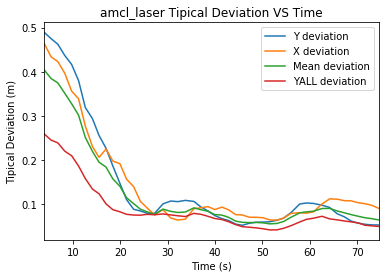

In [12]:
data.plot(kind = "line", x = "Time" ,y = {"X deviation", "Y deviation", "YALL deviation", "Mean deviation"})
plt.ylabel("Tipical Deviation (m)")
plt.xlabel("Time (s)")
plt.title(file + " Tipical Deviation VS Time")
plt.savefig(file + "_tipical_desviation.png")

In [17]:
mean_x_error = round(data["X position error"].mean(), 3)
mean_y_error = round(data["Y position error"].mean(), 3)
mean_pos_error = round(data["Position error"].mean(), 3)
mean_yall = round(data["YALL error"].abs().mean(), 3)
mean_x_covariance = round(data["X deviation"].mean(), 3)
mean_y_covariance = round(data["Y deviation"].mean(), 3)
mean_yall_covariance = round(data["YALL deviation"].mean(), 3)
mean_covariance = round(data["Mean deviation"].mean(), 3)
mean_weight_laser = round(data_4["Weight Laser"].mean(), 3)
mean_weight_marker = round(data_4["Weight Marker"].mean(), 3)
name_file = path + file + "_results.txt"
results = open(name_file, "w")
results.write("Mean laser weight: " + str(mean_weight_laser) + "\n")
results.write("Mean Marker weight: " + str(mean_weight_marker) + "\n")
results.write("Mean X position error: " + str(mean_x_error) + "\n")
results.write("Mean Y position error: " + str(mean_y_error) + "\n")
results.write("Mean Pos position error: " + str(mean_pos_error) + "\n")
results.write("Mean YALL error: " + str(mean_yall) + "\n")
results.write("Mean X deviation: " + str(mean_x_covariance) + "\n")
results.write("Mean Y deviation: " + str(mean_y_covariance) + "\n")
results.write("Mean YALL deviation: " + str(mean_yall_covariance) + "\n")
results.write("Mean deviation: " + str(mean_covariance) + "\n")
results.close()